# Assignment Activity 1: Making predictions with regression

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Question 2: Import the Python Libraries and Load Data

In [2]:
# Load the data 

# Specifying the path to the CSV file
file_path ='/Users/orkestro/Downloads/LSE_DA301_assignment_files/turtle_reviews.csv'

In [3]:
# Reading the CSV file into a DataFrame named 'reviews'
try:
    reviews = pd.read_csv(file_path)
    print("Data loaded successfully!\n")
    print("First few rows of the data:")
    print(reviews.head())
except FileNotFoundError:
    print("File not found! Please check the file path and try again.")

Data loaded successfully!

First few rows of the data:
   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Am

In [4]:
# Basic data exploration 

print(reviews.head())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [5]:
print(reviews.shape)

(2000, 11)


## Question 3: Sense-check the DataFrame

In [6]:
# Print the dataframe 

print(reviews.head())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [7]:
# Data types and metadata

print(reviews.dtypes)

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [8]:
# Check additional metadata 

print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [9]:
# Check for missing values

print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [10]:
# Descriptive statistics 

print(reviews.describe())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## Question 3: Remove Redundant Columns 

In [11]:
# Drop redundant columns

reviews_cleaned = reviews.drop(columns=['language', 'platform'])

## Question 4: Change Column Headings

In [12]:
# Rename columns for easier reference

reviews_cleaned.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, inplace=True)

In [13]:
# Confirm changes

print("Column names after renaming:")
print(reviews_cleaned.columns.tolist())

Column names after renaming:
['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product', 'review', 'summary']


## Question 5: Save Clean DataFrame

In [14]:
# Save cleaned data

reviews_cleaned.to_csv('reviews_cleaned.csv', index=False)

## Question 6: Import and Sense-Check Cleaned Data

In [15]:
# Reimport saved cleaned data
reviews_reloaded = pd.read_csv('reviews_cleaned.csv')

In [16]:
# Check reloaded data
print("\nReloaded data column names:")
print(reviews_reloaded.columns.tolist())


Reloaded data column names:
['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product', 'review', 'summary']


## Question 7: Linear Regression Analysis

In [17]:
import statsmodels.api as sm

# Ensure that 'reviews_cleaned' DataFrame contains the relevant data
X = reviews_cleaned[['age', 'remuneration', 'spending_score']]
Y = reviews_cleaned['loyalty_points']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

In [18]:
# Extract estimated parameers and generate regression table

# Getting the estimated parameters
params = model.params
print("Parameters: ", params)

# Getting standard errors
std_err = model.bse
print("\nStandard Errors: ", std_err)

# Getting predicted values
predictions = model.predict(X)

# Display the regression table
print("\nSummary: ", model.summary())

Parameters:  const            -2203.059751
age                 11.060659
remuneration        34.008385
spending_score      34.183197
dtype: float64

Standard Errors:  const             52.360900
age                0.868845
remuneration       0.497000
spending_score     0.451931
dtype: float64

Summary:                              OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:20:44   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                          

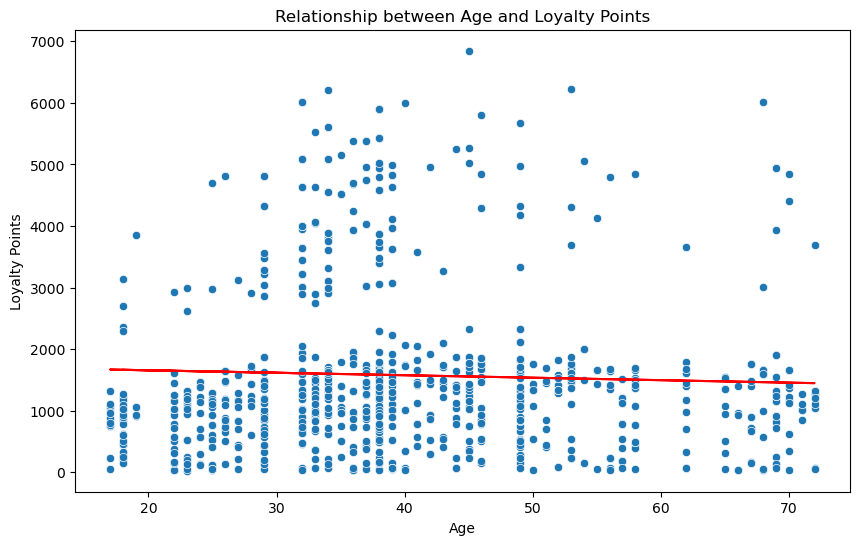

In [19]:
# Plotting the regression line

import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualizing relationship between 'age' and 'loyalty_points'
plt.figure(figsize=(10,6))
sns.scatterplot(x=reviews_cleaned['age'], y=reviews_cleaned['loyalty_points'])

# Getting predictions when considering 'age' as the only independent variable
single_var_model = sm.OLS(Y, sm.add_constant(reviews_cleaned['age'])).fit()
plt.plot(reviews_cleaned['age'], single_var_model.predict(sm.add_constant(reviews_cleaned['age'])), color='red')

plt.title('Relationship between Age and Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.show()